% ISOM 3025 Lect6
% Yi Ding
% 26 November 2022

# Lecture 6: Simulation Wealther Forecast


## Outlines

In this lecture:

* Build weather forecast model
* Use python to simulate wealth process and implement wealther forecast



## Weather forecast model


we will consider only two climatic conditions/states,
that is, sunny and rainy. Our model will assume that tomorrow's weather conditions
will be affected by today's weather conditions, making the process take on Markovian
characteristics. This link between the two states will be represented by the following
transition matrix:
$$0.8,\;0.20\\
0.25,\;0.75$$
representing
$$P(sunny|sunny),\;P(rainy|sunny)\\
P(sunny|rainy),P(rainy|rainy)
$$
For example, $P(rainy|sunny)$ the probability of the next day is rainy given that today is sunny. 

The climatic
conditions show a tendency to resist change. For this reason, after a sunny day, the
probability of another sunny – $P (sunny | sunny)$ – day is greater than a rainy – $P (rainy|sunny)$ day.
The climatic conditions of tomorrow are not directly related to those of
yesterday but only today; it follows that the process is Markovian.


### Simulate weather process



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(3)

In [3]:
# define the possible states of the weather conditions:
StatesData = ['Sunny','Rainy']

In [4]:
#transition between the weather conditions will be set as follows:
TransitionStates = [['Su-to-Su','Su-to-Ra'],['Ra-to-Su','Ra-to-Ra']]
TransitionMatrix = [[0.80,0.20],[0.25,0.75]]

In [6]:
WeatherProcess = list()
NumDays=365
TodayCond = StatesData[0]
print('Weather initial condition =',TodayCond)





Weather initial condition = Sunny


Next, we can predict the weather conditions for NumDays using for loops.


In [7]:

for i in range(0, NumDays):
    if TodayCond == 'Sunny':
        TransCondition = np.random.choice(TransitionStates[0],replace=True,p=TransitionMatrix[0])
        if TransCondition == 'Su-to-Su':
            pass
        else:
            TodayCond = 'Rainy'
        
    elif TodayCond == 'Rainy':
        TransCondition = np.random.choice(TransitionStates[1],replace=True,p=TransitionMatrix[1])
        if TransCondition == 'Ra-to-Ra':
            pass
        else:
            TodayCond = 'Sunny'
            
    WeatherProcess.append(TodayCond)
    print(TodayCond)

Sunny
Sunny
Sunny
Sunny
Rainy
Rainy
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Rainy
Rainy
Rainy
Rainy
Rainy
Rainy
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Rainy
Rainy
Rainy
Rainy
Rainy
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Rainy
Rainy
Rainy
Rainy
Rainy
Rainy
Rainy
Rainy
Rainy
Rainy
Rainy
Rainy
Rainy
Rainy
Rainy
Rainy
Sunny
Sunny
Sunny
Sunny
Rainy
Rainy
Rainy
Sunny
Sunny
Rainy
Rainy
Rainy
Rainy
Sunny
Sunny
Sunny
Rainy
Rainy
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Rainy
Rainy
Sunny
Sunny
Sunny
Rainy
Rainy
Rainy
Sunny
Sunny
Sunny
Rainy
Rainy
Sunny
Rainy
Rainy
Rainy
Sunny
Sunny
Rainy
Rainy
Rainy
Rainy
Sunny
Sunny
Sunny
Rainy
Sunny
Rainy
Rainy
Rainy
Rainy
Sunny
Sunny
Rainy
Rainy
Rainy
Rainy
Rainy
Rainy
Rain

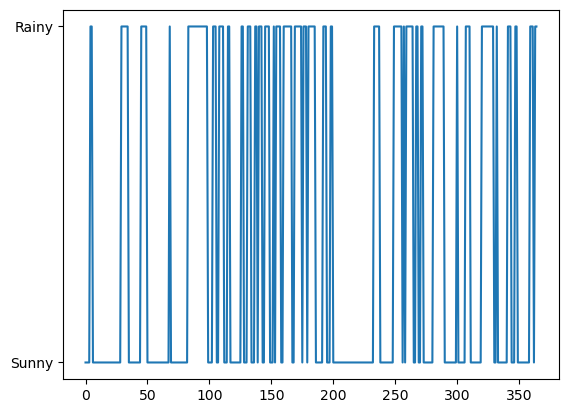

In [8]:
plt.plot(WeatherProcess)
plt.show()

### Weather forecast

Recall the total probaility formula:
    $$P(y)=P(y\cap x_1)+P(y \cap x_2)+... +P(y\cap x_n),$$ where suppose that event $x_i\cap x_j=0$ for $i\neq j$, and $\cup x_i=\Phi$. Also, we have $$P(y \cap x_i)=P(x_i)P(y|x_i).$$
    

Suppose that today $t$ is "sunny", based on today's weather, 

* What is probabilities of weathers for tomorrow $t+1$?
* What is probability of weathers for the day after tomorrow, $t+2$?
* What about $t+3$, $t+4$, ...

    
   

### Weather forecast for tomorrow

Given that today is "sunny", from transition matrix:
    We get forecast 
    
```
    The probability of sunny for day t+1 is 0.8; The probability of rainy for day t+1 is 0.2. 
    
```

### Weather forecast for multiple steps

Now we get $P(sunny_{t+1})=0.8$, and $P(rainy_{t+1})=0.2$. 

We can then use the transition matrix to compute the probability of sunny and rainy for $t+2$


$$
P(sunny_{t+2},summy_{t+1}|sunny_{t})=P(sunny_{t+2}|sunny_{t+1},sunny_t) P(sunny_{t+1}|sunny_t).
$$
omit the condition on $sunny_t$, and write
$$
P(sunny_{t+2},summy_{t+1})=P(sunny_{t+2}|sunny_{t+1}) P(sunny_{t+1}).
$$
Using total prob formula,
$$
P(sunny_{t+2})=P(sunny_{t+2},sunny_{t+1})+ P(sunny_{t+2},rainy_{t+1}).
$$
$$
P(sunny_{t+2})=P(sunny_{t+2}|sunny_{t+1}) P(sunny_{t+1})+P(sunny_{t+2}|rainy_{t+1})P(rain_{t+1})\\
=0.8*0.8+0.25*0.2=0.69
$$

We can immediately get $P(rainy_{t+2})=0.31$.

 We get forecast

    The probability of sunny for day t+2 is 0.69; The probability of rainy for day t+2 is 0.31.
    
    
We get forecast for the day $t+3$

$$
P(sunny_{t+3})=P(sunny_{t+3}|sunny_{t+2}) P(sunny_{t+2})+P(sunny_{t+3}|rainy_{t+2})P(rain_{t+2})=0.8*0.69+0.25*0.31\\
.
$$
And $P(rainy_{t+3})=1-P(sunny_{t+3})$.

We get forecast

    The probability of sunny for day t+3 is 0.6295; The probability of rainy for day t+3 is 0.3705.
 

Similarly, we can get forecast for day $t+4$, $t+5$, ...



In [10]:
print(0.8*0.69+0.25*0.31)
print(1-0.6295)

0.6295
0.37050000000000005


Next we use python to implement weather forecast

In [15]:
WeatherPred_Su = list()
WeatherPred_Ra = list()
NumDays=30
TodayCond = StatesData[1]
print('Weather initial condition =',TodayCond)

Pred_Su=0
Pred_Ra=1


Weather initial condition = Rainy


In [16]:
for i in range(0, NumDays):
        Prio_Su=Pred_Su
        Prio_Ra=Pred_Ra
        
        Pred_Su=Prio_Su*TransitionMatrix[0][0]+Prio_Ra*TransitionMatrix[1][0]
        Pred_Ra=1-Pred_Su
        WeatherPred_Su.append(Pred_Su)
        WeatherPred_Ra.append(Pred_Ra)
        print('Weather forecast for t+',i,": ", StatesData[0], Pred_Su, StatesData[1], Pred_Ra)


# #transition between the weather conditions will be set as follows:
# TransitionStates = [['Su-to-Su','Su-to-Ra'],['Ra-to-Su','Ra-to-Ra']]
# TransitionMatrix = [[0.80,0.20],[0.25,0.75]]

Weather forecast for t+ 0 :  Sunny 0.25 Rainy 0.75
Weather forecast for t+ 1 :  Sunny 0.3875 Rainy 0.6125
Weather forecast for t+ 2 :  Sunny 0.46312500000000006 Rainy 0.536875
Weather forecast for t+ 3 :  Sunny 0.5047187500000001 Rainy 0.4952812499999999
Weather forecast for t+ 4 :  Sunny 0.5275953125000001 Rainy 0.47240468749999986
Weather forecast for t+ 5 :  Sunny 0.5401774218750002 Rainy 0.4598225781249998
Weather forecast for t+ 6 :  Sunny 0.5470975820312501 Rainy 0.45290241796874986
Weather forecast for t+ 7 :  Sunny 0.5509036701171875 Rainy 0.44909632988281245
Weather forecast for t+ 8 :  Sunny 0.5529970185644532 Rainy 0.44700298143554684
Weather forecast for t+ 9 :  Sunny 0.5541483602104492 Rainy 0.4458516397895508
Weather forecast for t+ 10 :  Sunny 0.5547815981157471 Rainy 0.4452184018842529
Weather forecast for t+ 11 :  Sunny 0.555129878963661 Rainy 0.44487012103633905
Weather forecast for t+ 12 :  Sunny 0.5553214334300136 Rainy 0.4446785665699864
Weather forecast for t+ 13 

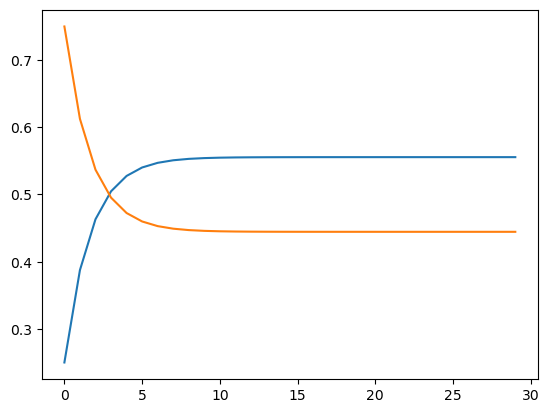

In [17]:
plt.plot(WeatherPred_Su)
plt.plot(WeatherPred_Ra)
plt.show()

The prediction converges to the **stationary state $x$** of the system, which is states probability that solves

$$P^Tx=x,$$ 
where $P$ is the transition matrix, and $x$ is the stationary probaility of the states.

In [19]:
import numpy as np
from numpy.linalg import eig

eig_value, eig_vector =eig(np.transpose(TransitionMatrix))


print(eig_value)
print(eig_vector)

[1.   0.55]
[[ 0.78086881 -0.70710678]
 [ 0.62469505  0.70710678]]


In [20]:
x=[eig_vector[0,0],eig_vector[1,0]]/(eig_vector[0,0]+eig_vector[1,0])
print(x)

[0.55555556 0.44444444]


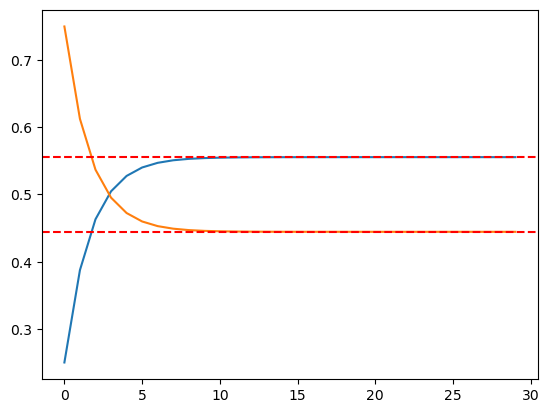

In [21]:
plt.plot(WeatherPred_Su)
plt.plot(WeatherPred_Ra)
#help(plt.axhline)
plt.axhline(y=x[0],linestyle="dashed",color="r")
plt.axhline(y=x[1],linestyle="dashed",color="r")

plt.show()

[[0.8, 0.2], [0.25, 0.75]]
